In [1]:
import sys
sys.path.append("..")

import dataInterpreter as dt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering 
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.spatial.distance import squareform
from sklearn.metrics import adjusted_rand_score

In [2]:
data = dt.get_data('biopsy', 'healthy', 'sars-cov2')
columns_healthy = dt.get_columns('biopsy', 'healthy')
columns_sars_cov2 = dt.get_columns('biopsy', 'sars-cov2')

filtered_data = dt.get_p_values('welch', data, columns_healthy, columns_sars_cov2, limit = 0.01)
filtered_data

,Series15_HealthyLungBiopsy_2,Series15_HealthyLungBiopsy_1,Series15_COVID19Lung_2,Series15_COVID19Lung_1,p-value
WASH7P,5.568345,4.948760,0.0,0.000000,0.003453
LOC100288069,1.609438,1.945910,0.0,0.000000,0.008838
LINC00115,3.951244,3.850148,0.0,0.000000,0.000168
NOC2L,6.988413,7.595890,0.0,0.693147,0.004373
C1orf159,5.036953,5.347108,0.0,0.000000,0.000891
...,...,...,...,...,...
TBL1Y,1.386294,1.386294,0.0,0.000000,0.000000
PRKY,6.403574,7.158514,0.0,0.000000,0.003084
TMSB4Y,2.772589,2.639057,0.0,0.000000,0.000608
BCORP1,2.833213,2.397895,0.0,0.000000,0.006854


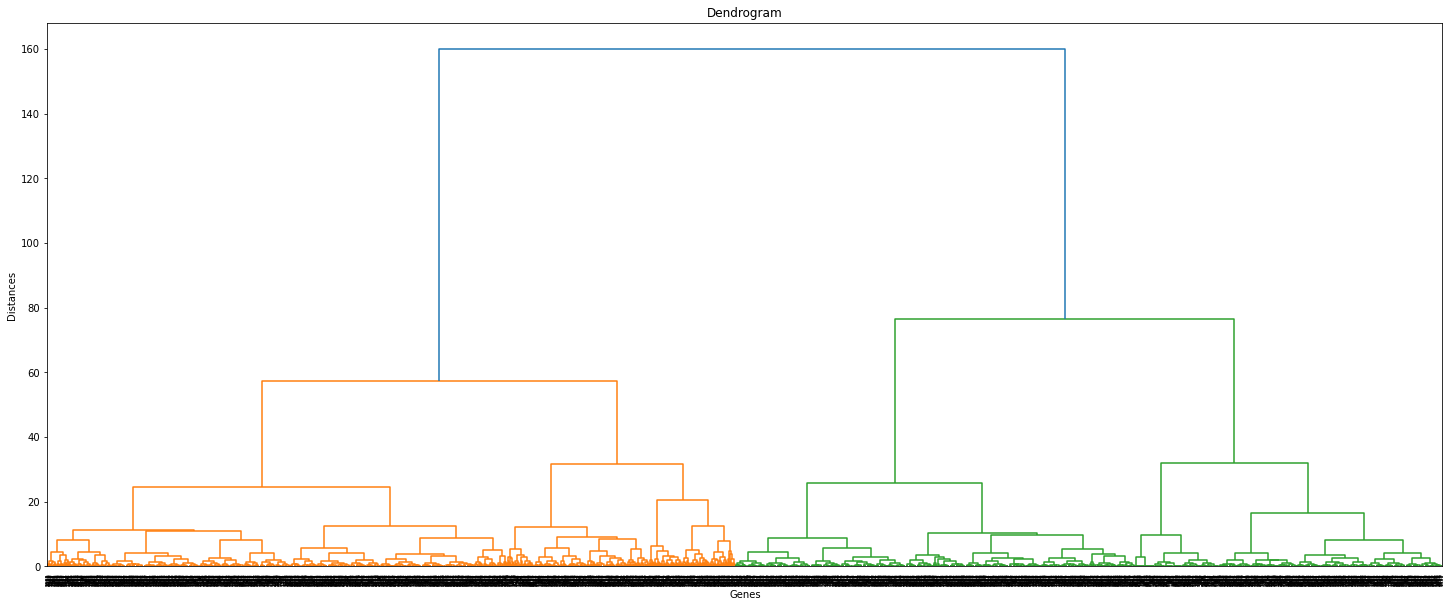

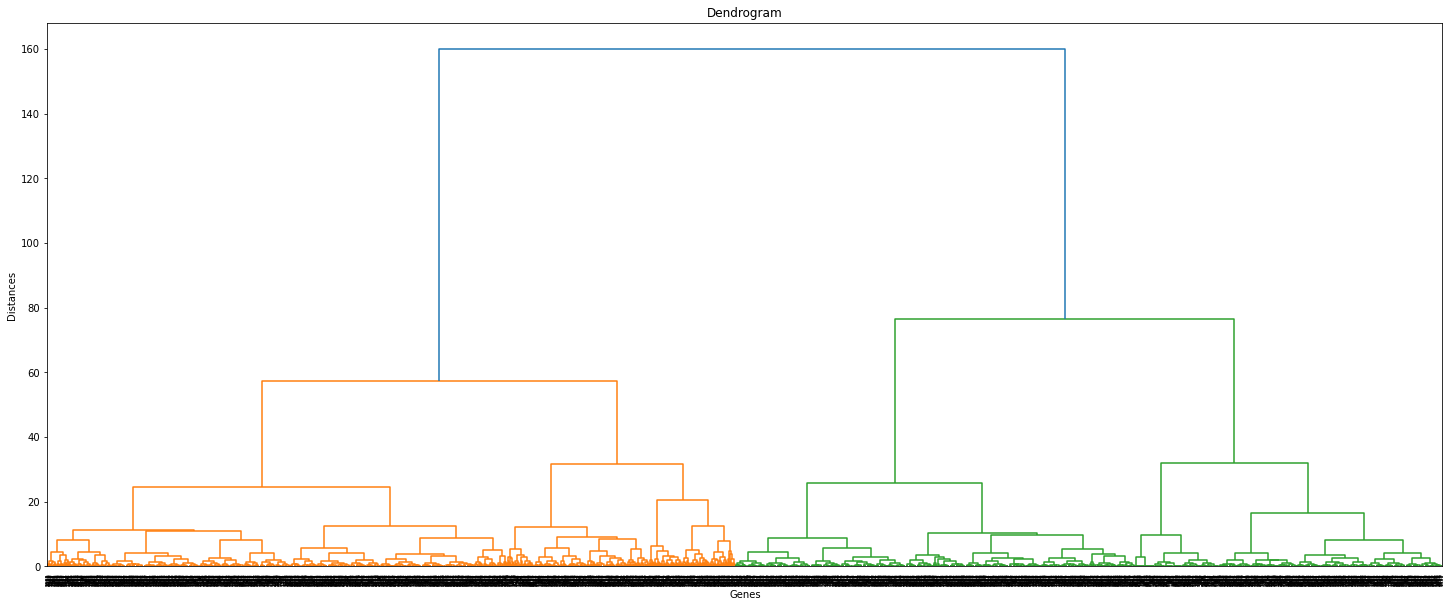

In [3]:
filtered_data.drop(['p-value'], axis = 1, inplace = True)
dt.plot_dendrogram(filtered_data)

In [4]:
labels = {}

models = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage ='ward')
labels['distance'] = models.fit_predict(filtered_data)

In [5]:
labels['distance']

array([0, 1, 2, ..., 1, 1, 1], dtype=int64)

In [6]:
dissimilarity = 1 - np.abs(filtered_data.T.corr())
m = squareform(dissimilarity)

m[np.abs(m) < 1e-12] = 0

hierarchy = linkage(m, method='ward')
labels['pearson'] = fcluster(hierarchy, 3, criterion='maxclust') - 1

In [7]:
labels['pearson']

array([0, 2, 2, ..., 2, 0, 2], dtype=int32)

In [8]:
dissimilarity = 1 - np.abs(filtered_data.T.corr(method='spearman'))
hierarchy = linkage(squareform(dissimilarity), method='ward')
labels['spearman'] = fcluster(hierarchy, 3, criterion='maxclust') - 1

In [11]:
labels['spearman']

array([0, 2, 0, ..., 0, 0, 2], dtype=int32)

In [9]:
from itertools import groupby

clusters = {}

for key1, label1 in labels.items():
    clusters[key1] = [list(map(lambda x: x[0], v)) for k,v in groupby(sorted(zip(filtered_data.index, labels['spearman']), key = lambda x: x[1]), lambda s: s[1])]
    
    for key2, label2 in labels.items():
        if key1 != key2:
            print(key1, ' vs ', key2, ': ', adjusted_rand_score(label1, label2))

distance  vs  pearson :  0.01696378009771689
distance  vs  spearman :  0.0035994757315617673
pearson  vs  distance :  0.01696378009771689
pearson  vs  spearman :  0.4307381756100609
spearman  vs  distance :  0.0035994757315617673
spearman  vs  pearson :  0.4307381756100609


In [ ]:
i = 0
for c in clusters['distance']:
    print("\n\nCluster", i, ":\n")
    i += 1
    for x in c:
        print(x)

In [ ]:
i = 0
for c in clusters['pearson']:
    print("\n\nCluster", i, ":\n")
    i += 1
    for x in c:
        print(x)

In [ ]:
i = 0
for c in clusters['spearman']:
    print("\n\nCluster", i, ":\n")
    i += 1
    for x in c:
        print(x)

In [10]:
import enrichmentAnalysis as ea

results_enrichment = {'distance': [], 'pearson': [], 'spearman': []}

for cluster_type in clusters:
    for cluster in clusters[cluster_type]:
        results_enrichment[cluster_type] += [ea.getEnrichment(list(cluster), 'GO_Biological_Process_2021')['GO_Biological_Process_2021']]

results_enrichment

Order of returned results is: Rank, Term name, P-value, Z-score, Combined score, Overlapping genes, Adjusted p-value, Old p-value, Old adjusted p-value
Order of returned results is: Rank, Term name, P-value, Z-score, Combined score, Overlapping genes, Adjusted p-value, Old p-value, Old adjusted p-value
Order of returned results is: Rank, Term name, P-value, Z-score, Combined score, Overlapping genes, Adjusted p-value, Old p-value, Old adjusted p-value
Order of returned results is: Rank, Term name, P-value, Z-score, Combined score, Overlapping genes, Adjusted p-value, Old p-value, Old adjusted p-value
Order of returned results is: Rank, Term name, P-value, Z-score, Combined score, Overlapping genes, Adjusted p-value, Old p-value, Old adjusted p-value
Order of returned results is: Rank, Term name, P-value, Z-score, Combined score, Overlapping genes, Adjusted p-value, Old p-value, Old adjusted p-value
Order of returned results is: Rank, Term name, P-value, Z-score, Combined score, Overlap

{'distance': [[[1,
    'skeletal system morphogenesis (GO:0048705)',
    0.0004398408526272117,
    3.981885704126583,
    30.776383219549427,
    ['WWOX',
     'SFRP4',
     'HOXB4',
     'HOXC4',
     'HOXB3',
     'FUZ',
     'HOXC9',
     'TBX4',
     'DSCAML1',
     'FGFR3',
     'HOXA4'],
    0.9999949764635631,
    0,
    0],
   [2,
    'positive regulation of adenylate cyclase activity (GO:0045762)',
    0.0012999751199259607,
    14.921138211382114,
    99.15708336746214,
    ['STIM1', 'CACNA1D', 'AKAP5', 'CACNA1C'],
    0.9999949764635631,
    0,
    0],
   [3,
    'embryonic skeletal system development (GO:0048706)',
    0.0016596708648190296,
    3.8807339449541285,
    24.84110564690093,
    ['WNT11',
     'SLC2A10',
     'HOXB4',
     'HOXC4',
     'HOXB3',
     'FUZ',
     'HOXC9',
     'DSCAML1',
     'HOXA4'],
    0.9999949764635631,
    0,
    0],
   [4,
    'regulation of Wnt signaling pathway (GO:0030111)',
    0.004040086167788384,
    2.1739078681109394,
    11.98

In [11]:
import json

with open('results_Biopsy.json', 'w') as file:
     file.write(json.dumps(results_enrichment)) # use `json.loads` to do the reverse

In [2]:
import json

with open('results_Biopsy.json') as file:
    results_enrichment = json.load(file)

In [3]:
dataset = {'p-value': [], 'Score': [], 'Cluster': []}
index = []

for cluster_num in range(len(results_enrichment['distance'])):
    for term in results_enrichment['distance'][cluster_num]:
        index += [term[1]]
        dataset['p-value'] += [term[6]]
        dataset['Score'] += [term[4]]
        dataset['Cluster'] += [cluster_num]
enrichment_dataset = pd.DataFrame(dataset, index = index)

In [7]:
pd.set_option("display.max_rows", None)
selection = enrichment_dataset[enrichment_dataset['p-value'] < 0.01].sort_values('Score', ascending = False).head(25)

selection['p-value'] = selection['p-value'].map(lambda x: '%.2E' % x)
selection['Score'] = selection['Score'].map(lambda x: '%.2f' % x)

selection.to_csv('Biopsy_table.csv')
selection

,p-value,Score,Cluster


## Clustering on columns

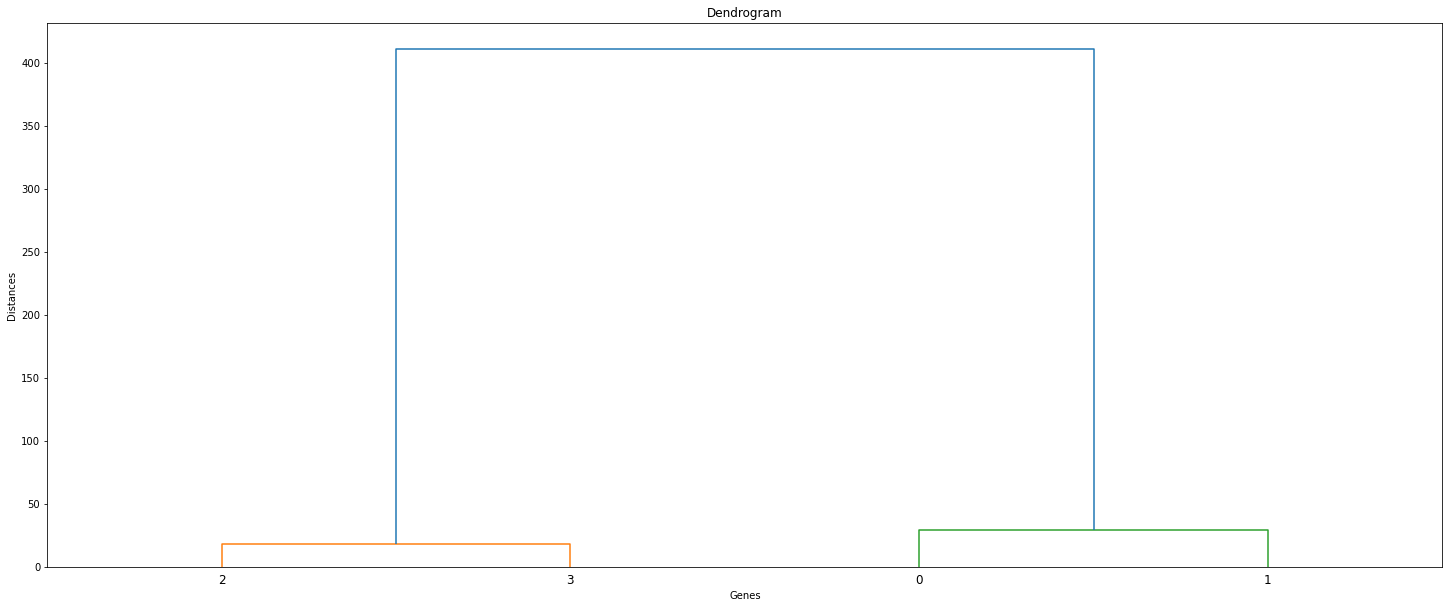

In [14]:
dt.plot_dendrogram(filtered_data.T)

In [15]:
labels_columns = {}

models = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage ='ward')
labels_columns['distance'] = models.fit_predict(filtered_data.T)

labels_true = [0 if col in columns_healthy else 1 for col in filtered_data.columns]

print("True: ", labels_true)
print("Predicted: ", labels_columns['distance'])
print(adjusted_rand_score(labels_true, labels_columns['distance']))

True:  [0, 0, 1, 1]
Predicted:  [0 0 1 1]
1.0
